# Setting up your `python` environment

We will be using `python 3` and `ipython notebook`/`jupyter` extensively in this course. You need to set up the correct `python` environment first. Below are some instructions in a Mac OS X 10.11 environment. You should be able to adapt it to other environments -- try Google if any problem.  

## Installing `anaconda` and `jupyter`

1. Download and install the `anaconda` installation package (for `python 3.6`) at https://www.continuum.io/downloads
2. Create a `py36` virtual environment by `conda create -n py36 python=3.6 anaconda`. See more at http://conda.pydata.org/docs/using/envs.html
3. Activiate `py36` (or put it on your `~/.bashrc`): `source activate py36`
4. To install a new package in an environment, switch to it and use `conda install -n PACKAGENAME` or `pip install PACKAGENAME`
5. Install `jupyter` by `conda install jupyter`


### Test your installation

```
% python -V
Python 3.6.1 :: Anaconda 4.4.0 (x86_64)
% ipython -V
5.3.0
% jupyter notebook
```


The last command shall open up a new page in your browser. Also check if you click the "new" button, there is a "python 3" choice under the 'notebooks'. 

## Using `jupyter`

Start with simple tutorial: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/index.html

Press `h` (you may need to press `ESC` first) to learn a few important keyboard shortcuts, e.g., 

* `SHIFT+RETURN`
* `A`, `B`, `X`
* `ESC`
* `ESC m`: to change the current cell to a `markdown` cell, 
* selecting multiple lines + `TAB` (indent them) / `Cmd + /` (block comment). 
* Note that mouse selection = copying to clipboard (sometimes annoying). 

Read the syntax of `markdown` at http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html and try it out by yourself. 

It also can display maths symbols/equations, e.g., $e^{ix} = cos(x) + i \cdot sin(x)$.

$$ P \implies Q  \qquad \equiv \qquad P \lor \neg Q $$

Try out cells with simple python code (or try the following cell in this notebook). 

**Tips**: 

* Recommended browser: firefox (Chrome has issues rendering maths fonts/equations)
* Your code may run into an infinite loop and you may HAVE TO kill the browser. So use a decent session manager for your browser. 

In [1]:
import random

n = 10
data = [random.randint(1, 10) for _ in range(n)]
data # this print out the variable's content

[2, 3, 7, 1, 10, 8, 5, 3, 3, 3]

## Exercise 1: Integer square root of an integer 

You need to write a function, `nsqrt()`, that takes as input an integer `x`, and return the largest integer that does not exceed $\sqrt{x}$. You need to abide by the following constraints:
1. The time complexity of your algorithm should be $O(\log x)$. 
2. You cannot use `sqrt()` function. 

For example, `nsqrt(11) = 3`, and `nsqrt(1369) = 37`. 


In [2]:
import math as math

def nsqrt(x):
    # return math.trunc(math.sqrt(x))
    left, right = (0, x)
    ans = (left + right) // 2
    while not (ans * ans <= x and (ans + 1) * (ans + 1) > x):
        # print(ans, ans* "!")
        if ans * ans > x :
            right = ans 
        else:
            left = ans
        ans = (left + right) // 2
    return ans 

You can test your implementation using the following code.

In [3]:
print(nsqrt(11), nsqrt(1369))

3 37


## Exercise 2: Root finding 

Use [Newton's method](https://en.wikipedia.org/wiki/Newton's_method) to find a root of an equation numerically. Newton's method starts from $x_0$ and iteratively computes $$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}.$$

Let us consider find a $x$ such that $f(x) = x \ln(x) - 16 = 0$. First, we plot the function and it seems $x$ is close to 8.0.

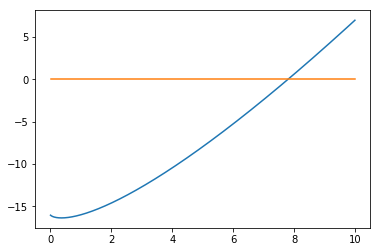

In [4]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import math

def f(x):
    return x * math.log(x) - 16.0

xvals = np.arange(0.01, 10, 0.01)        
yvals = np.array([f(x) for x in xvals])
plt.plot(xvals, yvals) 
plt.plot(xvals, 0*xvals)
plt.show()

To find $x$ for the equation, we need to compute the derivative of $f(x)$, i.e., $f'(x)$ first. 

$$f'(x) = (x \cdot \frac{1}{x} + 1 \cdot \ln(x)) + 0 = 1 + \ln(x)$$ 

We implement it as `fprime(x)`:

In [5]:
def fprime(x):
    return 1.0 + math.log(x)

Now you need to implement Newton's method below.

In [6]:
'''
x_0: initial guess
EPSILON: stop when abs(x - x_new) < EPSILON
MAX_ITER: maximum number of iterations

NOTE: you must use the default values of the above parameters, do not change them
'''
def find_root(f, fprime, x_0=1.0, EPSILON = 1E-7, MAX_ITER = 1000): # do not change the heading of the function
    times = 0
    while times  < 1000:
        x_new = x_0 - f(x_0) / fprime(x_0)
        if abs(x_0 - x_new) < EPSILON:
            return x_new
        else:
            x_0 = x_new
    return x_0

You can test your implementation using the following code.

Note that we will test your code using a different $f(x)$ (and its corresponding $f'(x)$). You need to perform similar tests by yourself. 



In [7]:
x = find_root(f, fprime)
print(x)
print(f(x))

7.792741452820329
0.0


## Exercise 3: Enumerating Combinations

You need to write a function, `comb(n, k)`, that returns a list consisting of all the combinations of $k$ elements out of a set $\{1, 2, \ldots, n\}$. Your implementation should be using recursions instead of `for` loop (you may use *list comprehension* though).  

In [8]:
import itertools
import numpy as np

def comb(n, k, m = 1):
    # return list(itertools.combinations(list(range(1, 7)), 3))
    if k <= 0:
        return [[]]
    if n - m + 1 == k:
        return [list(range(m, n + 1))]
    else:
        ans = []
        for x in range(m, n - (k - 1) + 1):
            old = comb(n, k - 1, x + 1)
            for line in old: 
                line.insert(0, x)
            ans += old
        return ans

In [9]:
comb(6, 3)

[[1, 2, 3],
 [1, 2, 4],
 [1, 2, 5],
 [1, 2, 6],
 [1, 3, 4],
 [1, 3, 5],
 [1, 3, 6],
 [1, 4, 5],
 [1, 4, 6],
 [1, 5, 6],
 [2, 3, 4],
 [2, 3, 5],
 [2, 3, 6],
 [2, 4, 5],
 [2, 4, 6],
 [2, 5, 6],
 [3, 4, 5],
 [3, 4, 6],
 [3, 5, 6],
 [4, 5, 6]]